In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
# from marvin.tools.cube import Cube
# import marvin
# from marvin import config
# config.switchSasUrl(sasmode='mirror')
import lime
import aspect


In [116]:
fits.open('/Users/kgozman/sas/dr17/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits')[1].data['mangaid'][10234]

'1-382839'

In [3]:
# from marvin.tools import Maps
# # config.switchSasUrl(sasmode='mirror')
# maps = Maps('8485-1901')

# # must use Maps.getSpaxel() to get cube and modelcube
# spax = maps.getSpaxel(x=17, y=17, xyorig='lower', cube=True, modelcube=True)

# # mask out pixels lacking model fit
# no_fit = ~spax.full_fit.masked.mask

# # extra arguments to plot are passed to the matplotlib routine
# ax = spax.flux.plot(label='observed')
# ax.plot(spax.full_fit.wavelength[no_fit], spax.full_fit.value[no_fit], label='model')
# ax.legend()

In [ ]:
# import marvin
# print(marvin.config.urlmap)

{'api': {'CubeView:add_config': {'methods': 'HEAD,GET,OPTIONS', 'url': '/marvin/api/cubes/add_config/'}, 'CubeView:check_release': {'methods': 'HEAD,GET,OPTIONS', 'url': '/marvin/api/cubes/check_release/{release}/'}, 'CubeView:index': {'methods': 'HEAD,GET,OPTIONS', 'url': '/marvin/api/cubes/'}, 'CubeView:reset_results': {'methods': 'HEAD,GET,OPTIONS', 'url': '/marvin/api/cubes/reset_results/'}, 'CubeView:reset_status': {'methods': 'HEAD,GET,OPTIONS', 'url': '/marvin/api/cubes/reset_status/'}, 'CubeView:set_allowed_releases': {'methods': 'HEAD,GET,OPTIONS', 'url': '/marvin/api/cubes/set_allowed_releases/'}, 'CubeView:update_results': {'methods': 'HEAD,GET,OPTIONS', 'url': '/marvin/api/cubes/update_results/{newresults}/'}, 'GeneralRequestsView:add_config': {'methods': 'HEAD,GET,OPTIONS', 'url': '/marvin/api/general/add_config/'}, 'GeneralRequestsView:check_release': {'methods': 'HEAD,GET,OPTIONS', 'url': '/marvin/api/general/check_release/{release}/'}, 'GeneralRequestsView:index': {'met

In [ ]:
# cube = marvin.tools.Cube('8626-12704')

In [ ]:
# cube.getImage()

<Marvin Image (plateifu='8626-12704', mode='remote', data-origin='api')>

In [ ]:
# pixel_mask_cube = cube.flux.ivar == 0

In [ ]:
# lcube = lime.Cube(cube.flux.wavelength.value, cube.flux.value, cube.flux.ivar, redshift=0.0475, units_flux='1e-17*FLAM', pixel_mask=pixel_mask_cube)

In [5]:

cube = fits.open('manga-8626-12704-LOGCUBE.fits')

In [119]:
fits_path = 'manga-8626-12704-LOGCUBE.fits'
fits_path = 'manga-7443-12703-LOGCUBE.fits'

In [120]:
with fits.open(fits_path) as hdul:

    # Wavelength 1D array
    wave = hdul['WAVE'].data

    # Flux 3D array
    flux_cube = hdul['FLUX'].data
    units_flux = '1e-17*FLAM'

    # Convert inverse variance cube to standard error, masking 0-value pixels first
    ivar_cube = hdul['IVAR'].data
    #pixel_mask_cube = pixel_mask_cube.reshape(ivar_cube.shape)
    #err_cube = np.sqrt(1/np.ma.masked_array(ivar_cube, pixel_mask_cube)) * 1e-17
    err_cube = np.sqrt(1/ivar_cube)
    pixel_mask_cube = ivar_cube == 0

    # Header
    hdr = hdul['FLUX'].header

/var/folders/v7/rf9_zpgn2zb2vg0vrzh3pbw00000gs/T/ipykernel_14867/3013465575.py:14: RuntimeWarning: divide by zero encountered in divide
  err_cube = np.sqrt(1/ivar_cube)


In [158]:
def get_spaxel_spectra(filename, x, y, plot=True):
    
    cube = lime.Cube.from_file(filename, instrument='manga')
    rest_wav = cube.wave_rest.data
    # flux = cube.flux.data

    spec = cube.get_spectrum(x, y)
    spec.infer.components()

    continuum_inds = np.array([0,1,2,10])
    emission_inds = np.array([3,6,7,8])
    absorption_inds = np.array([9,11])
    cosmic_ray_inds = np.array([4,5])

    cont = np.where(np.isin(spec.infer.pred_arr, continuum_inds))
    em = np.where(np.isin(spec.infer.pred_arr, emission_inds))
    absr = np.where(np.isin(spec.infer.pred_arr, absorption_inds))
    cr = np.where(np.isin(spec.infer.pred_arr, cosmic_ray_inds))

    flux = spec.flux.data
    continuum = flux[cont]
    emission = flux[em]
    absorption = flux[absr]
    cosmic_ray = flux[cr]

    cont_wav = rest_wav[cont]
    em_wav = rest_wav[em]
    absr_wav = rest_wav[absr]
    cr_wav = rest_wav[cr]

    if plot:
        plt.figure(figsize=(12, 8))
        plt.plot(rest_wav, flux, color='black', label='Observed')
        plt.plot(cont_wav, continuum, ".", color='blue', label='Continuum')
        plt.plot(em_wav, emission, ".", color='red', label='Emission')
        plt.plot(absr_wav, absorption, ".", color='green', label='Absorption')
        plt.plot(cr_wav, cosmic_ray, ".", color='orange', label='Cosmic Ray')
        plt.xlabel('Wavelength (Angstroms)')
        plt.ylabel('Flux (1e-17 FLAM)')
        plt.legend()
        plt.title(f'Spectrum at x={x}, y={y}')
        plt.show()

    return rest_wav, flux, continuum, emission, absorption, cosmic_ray, cont_wav, em_wav, absr_wav, cr_wav


    
    

a string value was expected. [astropy.wcs.wcs]
LiMe WARNING: No redshift provided for the spectrum. Assuming local universe observation (z = 0)


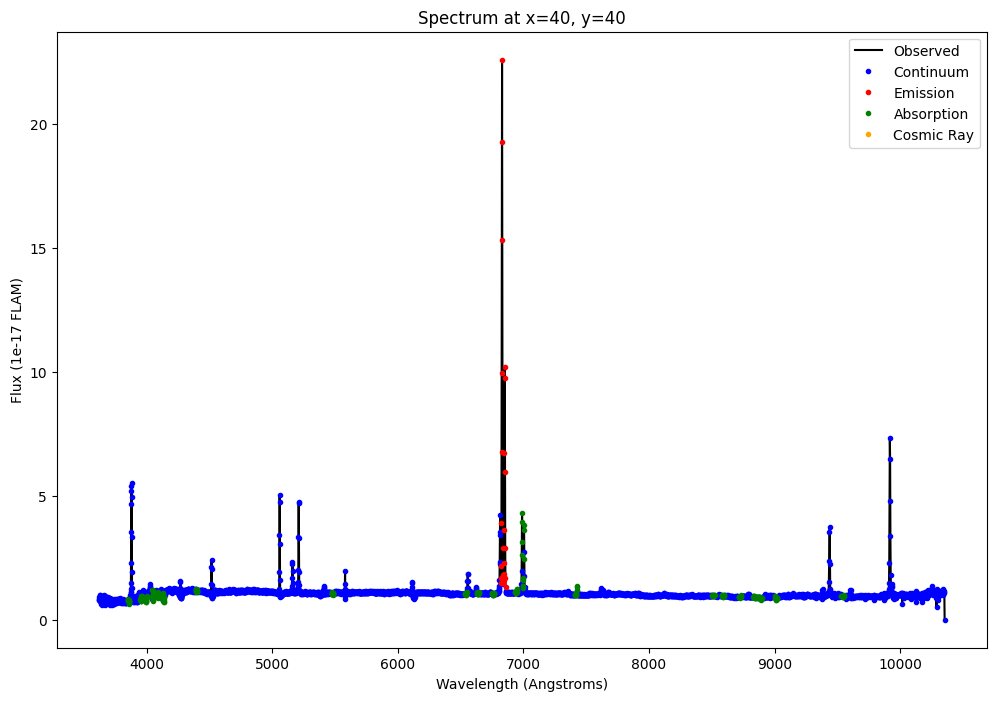

(array([ 3621.59598486,  3622.42998417,  3623.26417553, ...,
        10349.03843826, 10351.42166679, 10353.80544415], shape=(4563,)),
 array([0.8491345, 0.9114608, 0.779574 , ..., 1.1019714, 1.0814502,
        0.       ], shape=(4563,), dtype=float32),
 array([0.8491345, 0.9114608, 0.779574 , ..., 1.1019714, 1.0814502,
        0.       ], shape=(4271,), dtype=float32),
 array([ 1.4831216,  1.6651002,  2.1520147,  3.8979073,  9.949232 ,
        19.27698  , 22.57455  , 15.294737 ,  6.7671885,  2.9020658,
         1.800362 ,  1.4957358,  1.4959202,  1.6010876,  1.856689 ,
         2.2957847,  3.6222353,  6.7265677, 10.2073145,  9.741943 ,
         5.936507 ,  2.872245 ,  1.6848332,  1.3056881], dtype=float32),
 array([0.81771517, 0.7887139 , 0.79799104, 0.7925545 , 0.7530418 ,
        0.72416794, 0.65332973, 0.7240291 , 0.79208314, 0.75117815,
        0.7408267 , 0.7516655 , 0.82857704, 0.7994038 , 0.7907235 ,
        0.80758905, 0.8098649 , 0.755995  , 0.74065405, 0.77033293,
        0.8

In [168]:
get_spaxel_spectra(fits_path, 40,40)


In [326]:
cube = lime.Cube.from_file('manga-8626-12704-LOGCUBE.fits', instrument='manga', redshift=0)#, units_flux='1e-17*FLAM', pixel_mask=pixel_mask_cube)
wavelength_array = cube.wave_rest.data
flux_cube_array = cube.flux.data
wav = cube.wave

a string value was expected. [astropy.wcs.wcs]


In [327]:
spec = cube.get_spectrum(17,17)


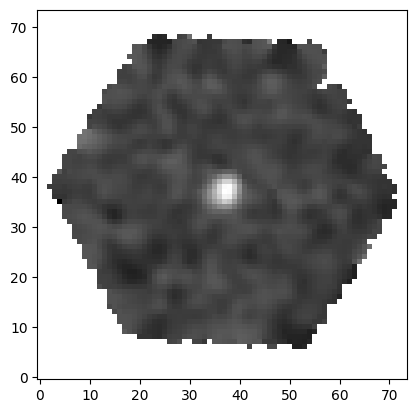

In [328]:
plt.imshow(cube.flux[0, :, :], cmap='gray', origin='lower')
plt.show()

In [365]:
from astropy.visualization import make_lupton_rgb
from astropy.visualization import make_rgb, ManualInterval, LogStretch, SqrtStretch, simple_norm, ZScaleInterval, SinhStretch

def get_cube_image(filename):
    cube = lime.Cube.from_file(filename, instrument='manga', redshift=0)#, units_flux='1e-17*FLAM', pixel_mask=pixel_mask_cube)

    # Define the wavelength ranges (as used in the notebook)
    wavelength_ranges = {
        'h_alpha': (6540, 6580),
        # 'h_beta': (4040, 4080), 
        # 'h_gamma': (4340, 4380),
        # 'h_delta': (4860, 4900),
        # 'h_epsilon': (5000, 5040),
        # 'h_zeta': (5870, 5910),
        # 'h_eta': (6640, 6680),
        'sii': (6700, 6750),
        'oiii': (4850, 5020) 

    }

    try:
        wavelength_array = cube.wave_rest.data
        flux_cube_array = cube.flux.data # Assumes shape (wavelength, y, x)
    except AttributeError as e:
        raise ValueError("Input 'cube' object must have 'wave_rest.data' and 'flux.data' attributes.") from e

    # compressed_flux = []

    # Store range names in a fixed order to ensure consistent output array ordering
    # Using the order defined in the dictionary initially
    range_names_ordered = list(wavelength_ranges.keys()) 

    rgb_array =[]
    for name in range_names_ordered:
        wavelength = wavelength_ranges[name]
        start, end = wavelength
        
        # Find indices corresponding to the wavelength range
        idx1, idx2 = np.searchsorted(wavelength_array, [start, end])
        print(idx1, idx2)
        if idx1 >= idx2:
            # Handle cases where the range is empty or invalid in the data's wavelength array
            flux_sum_in_range = 0.0 
        else:
            # Extract the spectrum slice *at the specific coordinate* for this range
            # IMPORTANT: Cube data is often (wavelength, y, x)
            spectrum_slice_at_coord = flux_cube_array[idx1:idx2]
            # plt.imshow(spectrum_slice_at_coord, cmap='gray', origin='lower')
            
            # # Sum the linear flux values within this slice
            flux_sum_in_range = np.nansum(spectrum_slice_at_coord, axis=0)
            print(np.mean(flux_sum_in_range))
            rgb_array.append(flux_sum_in_range)

            # # Handle potential NaN results if any flux values were NaN
            # if np.isnan(flux_sum_in_range):
            #     flux_sum_in_range = 1 # Or choose another appropriate fill value

    # compressed_flux.append(flux_sum_in_range)
    rgb_array = np.array(rgb_array)

    # # Select slices for red, green, and blue channels


    r = rgb_array[0]/np.max(rgb_array[0])
    g= rgb_array[1]/np.max(rgb_array[1])
    b = rgb_array[2]/np.max(rgb_array[2])

    # r = simple_norm(rgb_array[0], 'sqrt')
    # Use the maximum value of the 99.5% percentile over all three filters
    # as the maximum value:
    pctl = 99
    maximum = 0.
    for img in [r,g,b]:
        val = np.percentile(img,pctl)
        if val > maximum:
            maximum = val
    rgb = make_rgb(r,g,b, interval=ManualInterval(vmin=0, vmax=maximum),stretch=SqrtStretch(),
                filename="ngc6976-linear.jpeg")

    # wcs = cube.wcs
    # ax = plt.subplot(projection=wcs, slices=('x', 'y', 1))
    # ax.imshow(rgb, origin='lower')
    # plt.show()
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(rgb, origin='lower')
    plt.axis('off')
    plt.gca().set_axis_off()
    plt.savefig('%s.png'%filename, bbox_inches='tight', pad_inches=0)
    plt.show()
    # intervals = 3 * [ManualInterval(vmin=0, vmax=maximum)]
    # intervals[0] = ManualInterval(vmin=0, vmax=50.)
    # rgb_log = make_rgb(r,g,b, interval=intervals, stretch=LogStretch(a=10),
    #                    filename="ngc6976-log-alt.jpeg")
    # plt.imshow(rgb_log, origin='lower')
    # plt.show()
    # Create an RGB image
    # rgb_image = make_lupton_rgb(red_channel, green_channel, blue_channel, stretch=.1, Q=5)

    # # Plot the RGB image
    # plt.figure(figsize=(10, 10))
    # plt.imshow(rgb_image, origin='lower')
    # plt.title('RGB Image of the Cube')
    # plt.axis('off')
    # plt.show()

cubes/manga-8979-12701-LOGCUBE.fits


a string value was expected. [astropy.wcs.wcs]


2567 2594
1.0574626
2672 2705
1.1394206
1269 1419
5.9881988


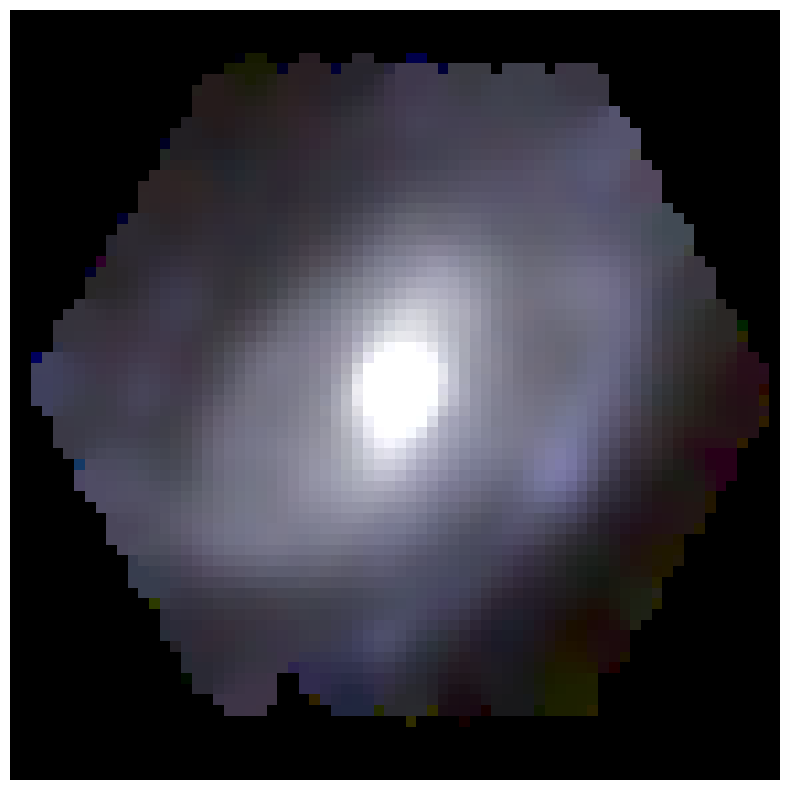

cubes/manga-7443-12703-LOGCUBE.fits


a string value was expected. [astropy.wcs.wcs]


2567 2594
2.6468496
2672 2705
3.042297
1269 1419
15.785025


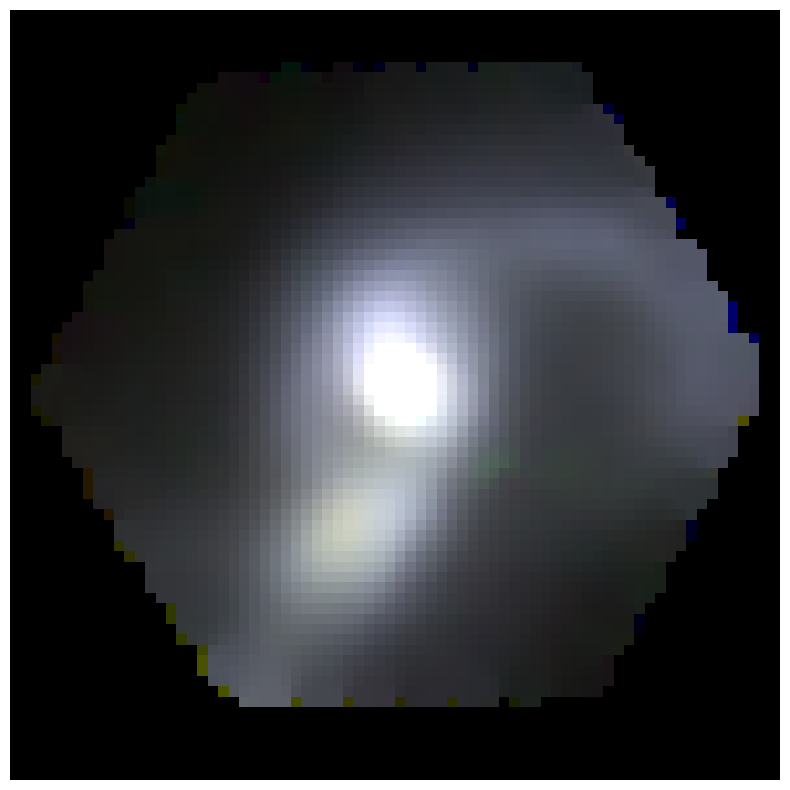

cubes/manga-7443-12704-LOGCUBE.fits


a string value was expected. [astropy.wcs.wcs]


2567 2594
1.3395165
2672 2705
1.8013612
1269 1419
7.7453017


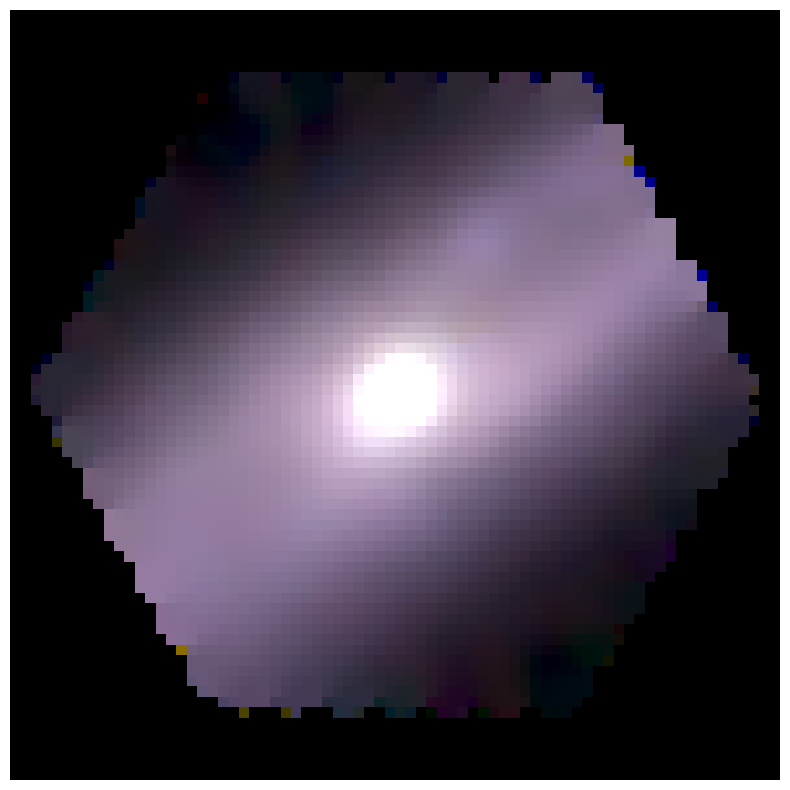

cubes/manga-9872-12705-LOGCUBE.fits


a string value was expected. [astropy.wcs.wcs]


2567 2594
0.6758416
2672 2705
0.80997145
1269 1419
3.3867252


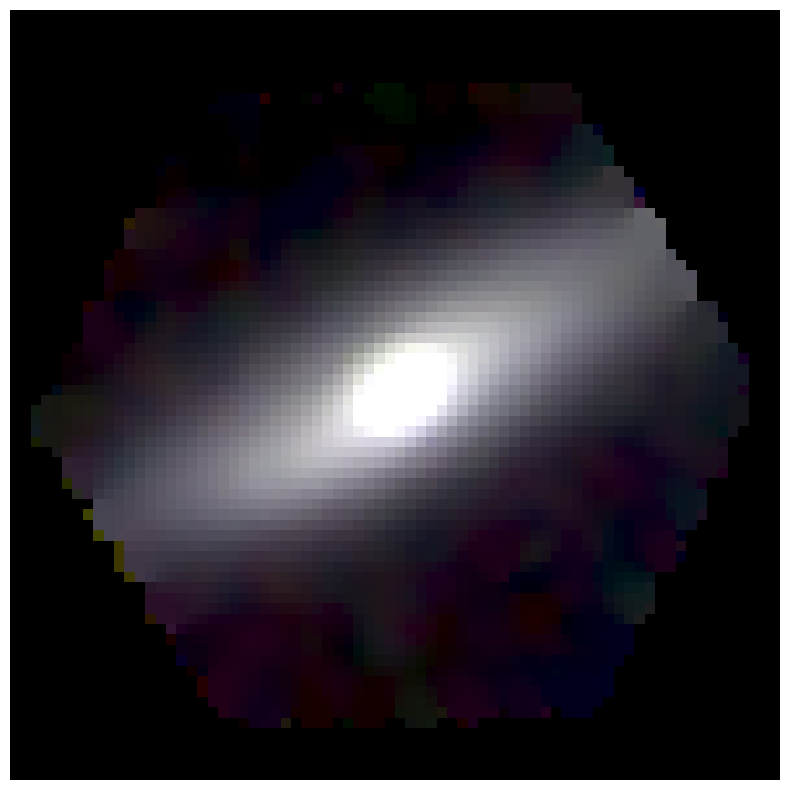

cubes/manga-9872-6104-LOGCUBE.fits


a string value was expected. [astropy.wcs.wcs]


2567 2594
0.5985271
2672 2705
0.72170633
1269 1419
3.5655065


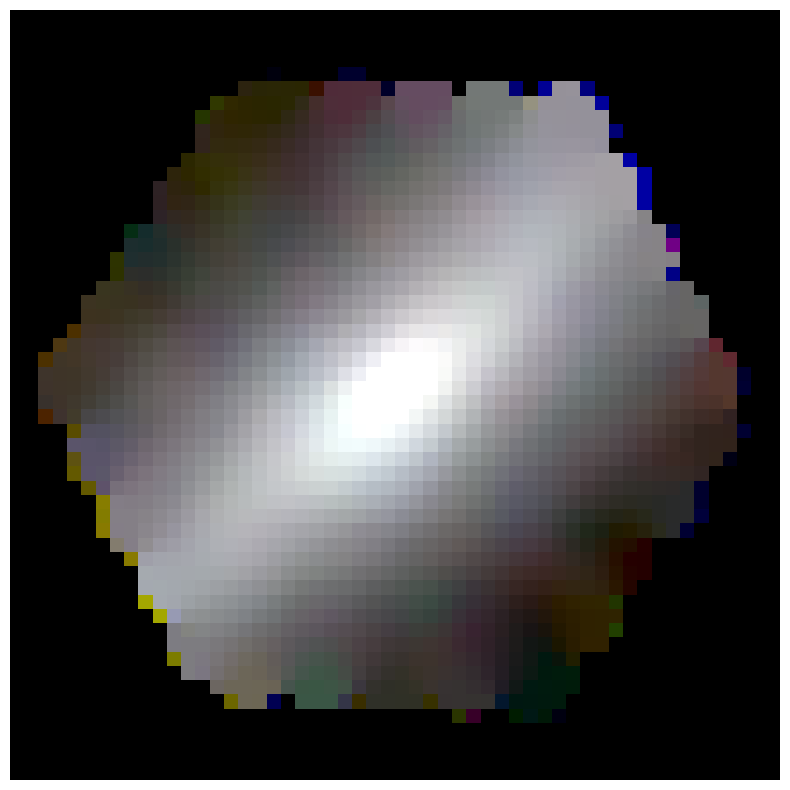

cubes/manga-8979-9101-LOGCUBE.fits


a string value was expected. [astropy.wcs.wcs]


2567 2594
1.1837237
2672 2705
1.3499593
1269 1419
6.360824


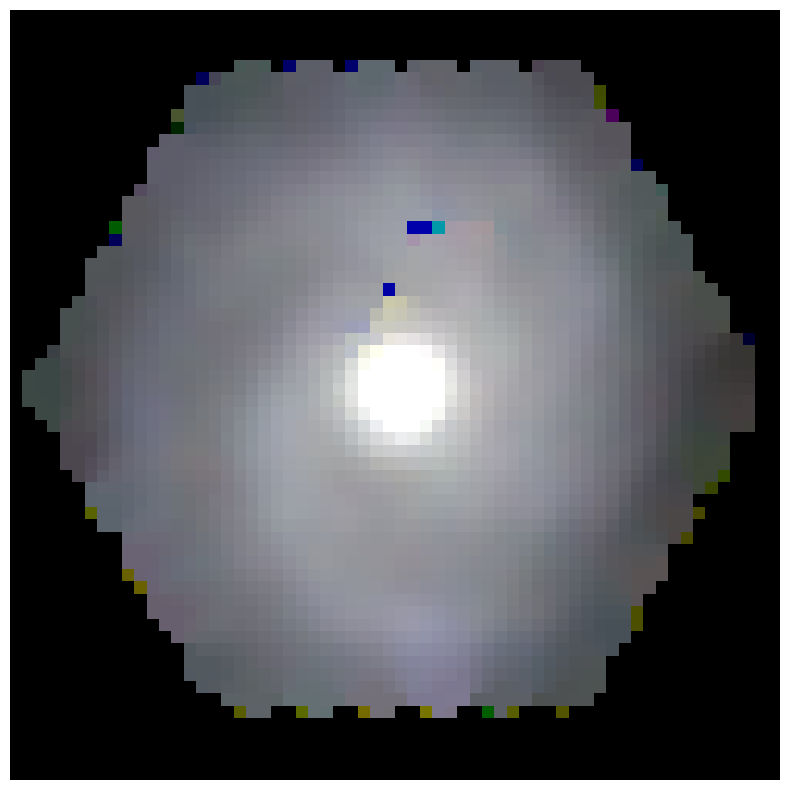

cubes/manga-8313-12701-LOGCUBE.fits


a string value was expected. [astropy.wcs.wcs]


2567 2594
2.5095444
2672 2705
2.9412897
1269 1419
15.027959


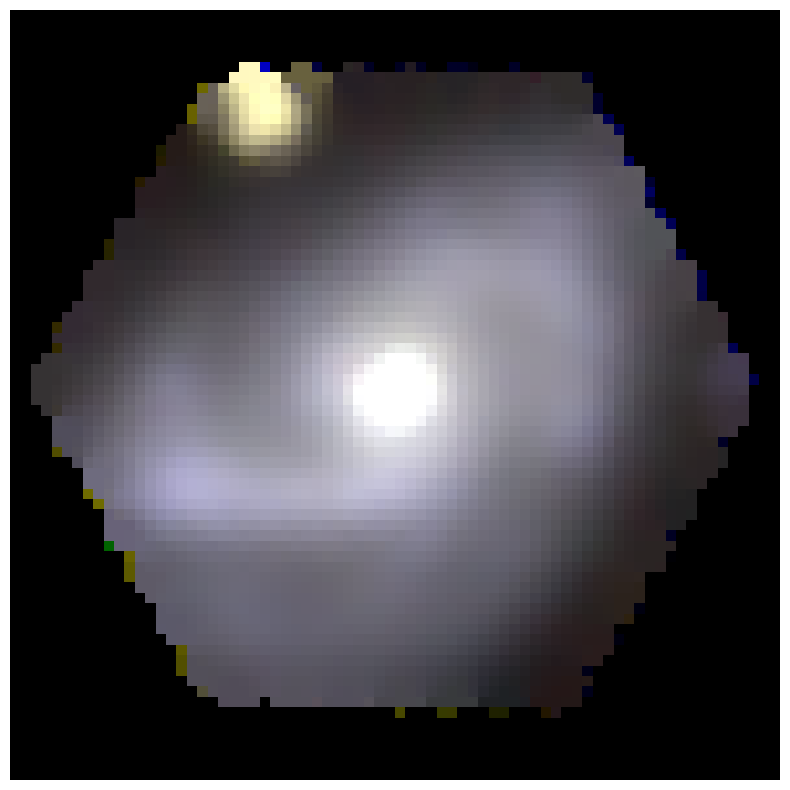

cubes/manga-9872-9102-LOGCUBE.fits


a string value was expected. [astropy.wcs.wcs]


2567 2594
2.7608013
2672 2705
3.4316025
1269 1419
16.219416


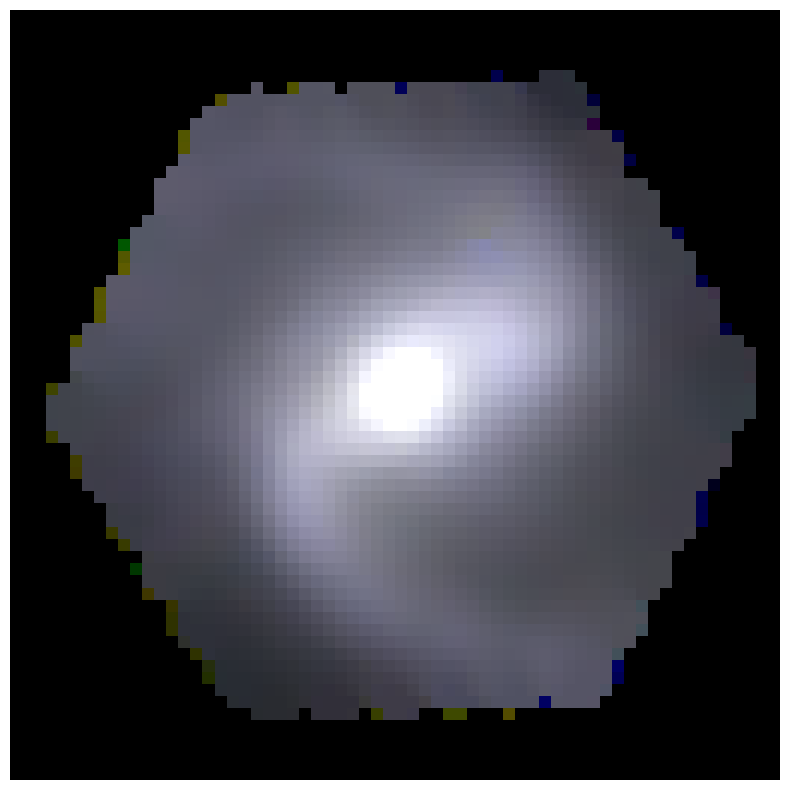

In [368]:
import glob
for fil in glob.glob('cubes/*.fits'):
    print(fil)
    get_cube_image(fil)
    # plt.savefig('%s.png'%fil, bbox_inches='tight', pad_inches=0)
    # plt.show()
    # plt.close()

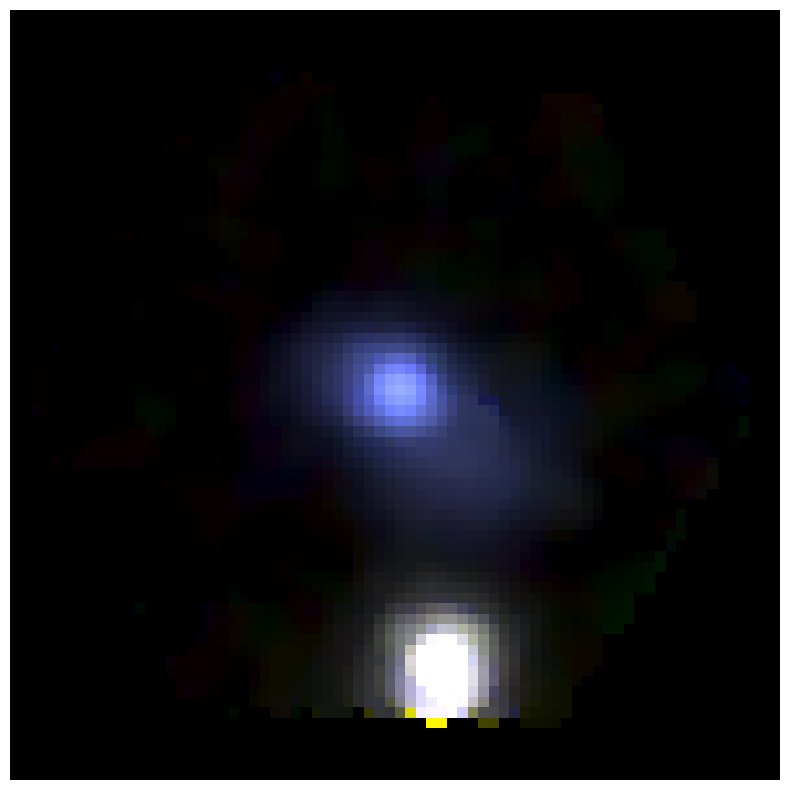

In [ ]:
# from astropy.visualization import make_lupton_rgb
# from astropy.visualization import make_rgb, ManualInterval, LogStretch, SqrtStretch, simple_norm, ZScaleInterval, SinhStretch

# # # Select slices for red, green, and blue channels
# # red_channel = np.sum(flux_cube[200:220], axis=0)   # Example slice for red
# # green_channel = np.sum(flux_cube[150:170], axis=0) # Example slice for green
# # blue_channel = np.sum(flux_cube[100:120], axis=0)  # Example slice for blue

# r = rgb_array[0]/np.max(rgb_array[0])
# g= rgb_array[1]/np.max(rgb_array[1])
# b = rgb_array[2]/np.max(rgb_array[2])

# # r = simple_norm(rgb_array[0], 'sqrt')
# # Use the maximum value of the 99.5% percentile over all three filters
# # as the maximum value:
# pctl = 99
# maximum = 0.
# for img in [r,g,b]:
#     val = np.percentile(img,pctl)
#     if val > maximum:
#         maximum = val
# rgb = make_rgb(r,g,b, interval=ManualInterval(vmin=0, vmax=maximum),stretch=SqrtStretch(),
#                filename="ngc6976-linear.jpeg")

# # wcs = cube.wcs
# # ax = plt.subplot(projection=wcs, slices=('x', 'y', 1))
# # ax.imshow(rgb, origin='lower')
# # plt.show()
# fig = plt.figure(figsize=(10, 10))
# plt.imshow(rgb, origin='lower')
# plt.axis('off')
# plt.gca().set_axis_off()
# plt.savefig('testgal.png', bbox_inches='tight', pad_inches=0)
# plt.show()
# # intervals = 3 * [ManualInterval(vmin=0, vmax=maximum)]
# # intervals[0] = ManualInterval(vmin=0, vmax=50.)
# # rgb_log = make_rgb(r,g,b, interval=intervals, stretch=LogStretch(a=10),
# #                    filename="ngc6976-log-alt.jpeg")
# # plt.imshow(rgb_log, origin='lower')
# # plt.show()
# # Create an RGB image
# # rgb_image = make_lupton_rgb(red_channel, green_channel, blue_channel, stretch=.1, Q=5)

# # # Plot the RGB image
# # plt.figure(figsize=(10, 10))
# # plt.imshow(rgb_image, origin='lower')
# # plt.title('RGB Image of the Cube')
# # plt.axis('off')
# # plt.show()

In [363]:
1000/60

16.666666666666668

In [179]:
spec.infer.components(show_steps=True)

/Users/kgozman/miniconda3/envs/codenova/lib/python3.13/site-packages/aspect/tools.py:20: RuntimeWarning: invalid value encountered in add
  mc_flux = flux_array[:, :, np.newaxis] + noise_array


<Figure size 1600x500 with 0 Axes>

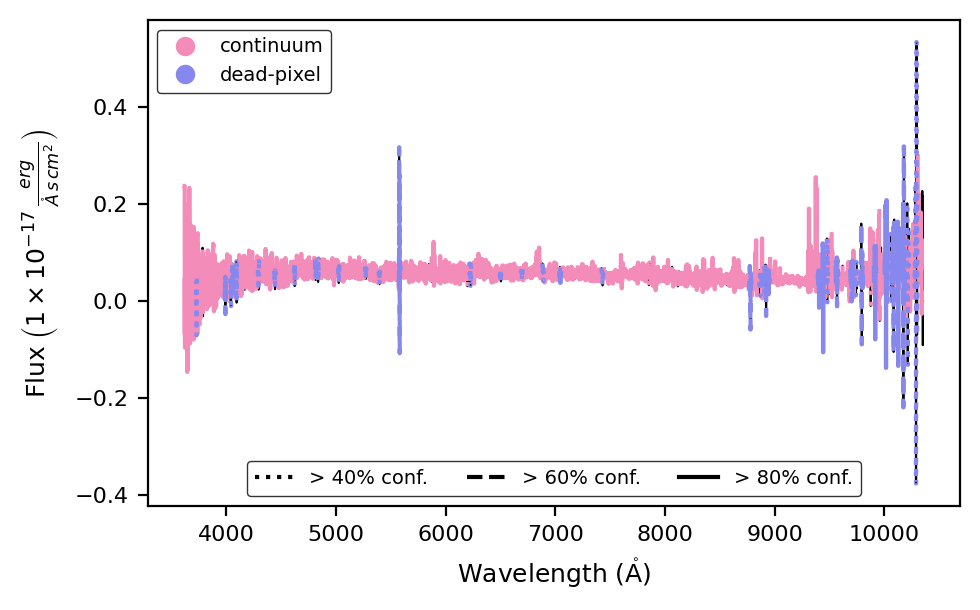

In [180]:
fig = plt.figure(figsize=(16, 5))
spec.plot.spectrum(show_categories=True)

In [133]:
spec.infer.pred_arr

array([2, 2, 2, ..., 0, 0, 0], shape=(4563,))

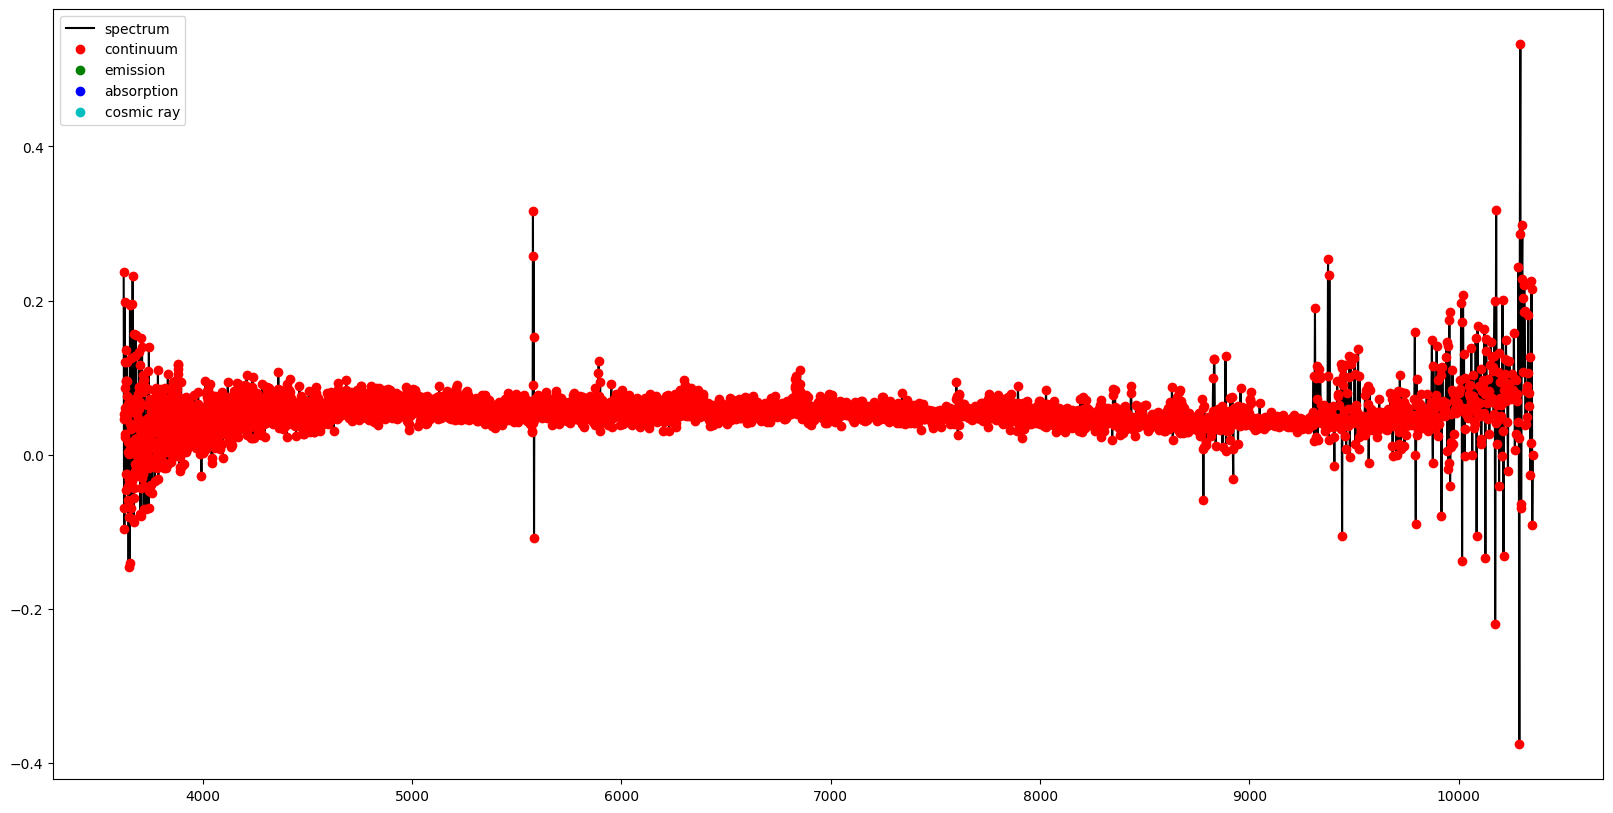

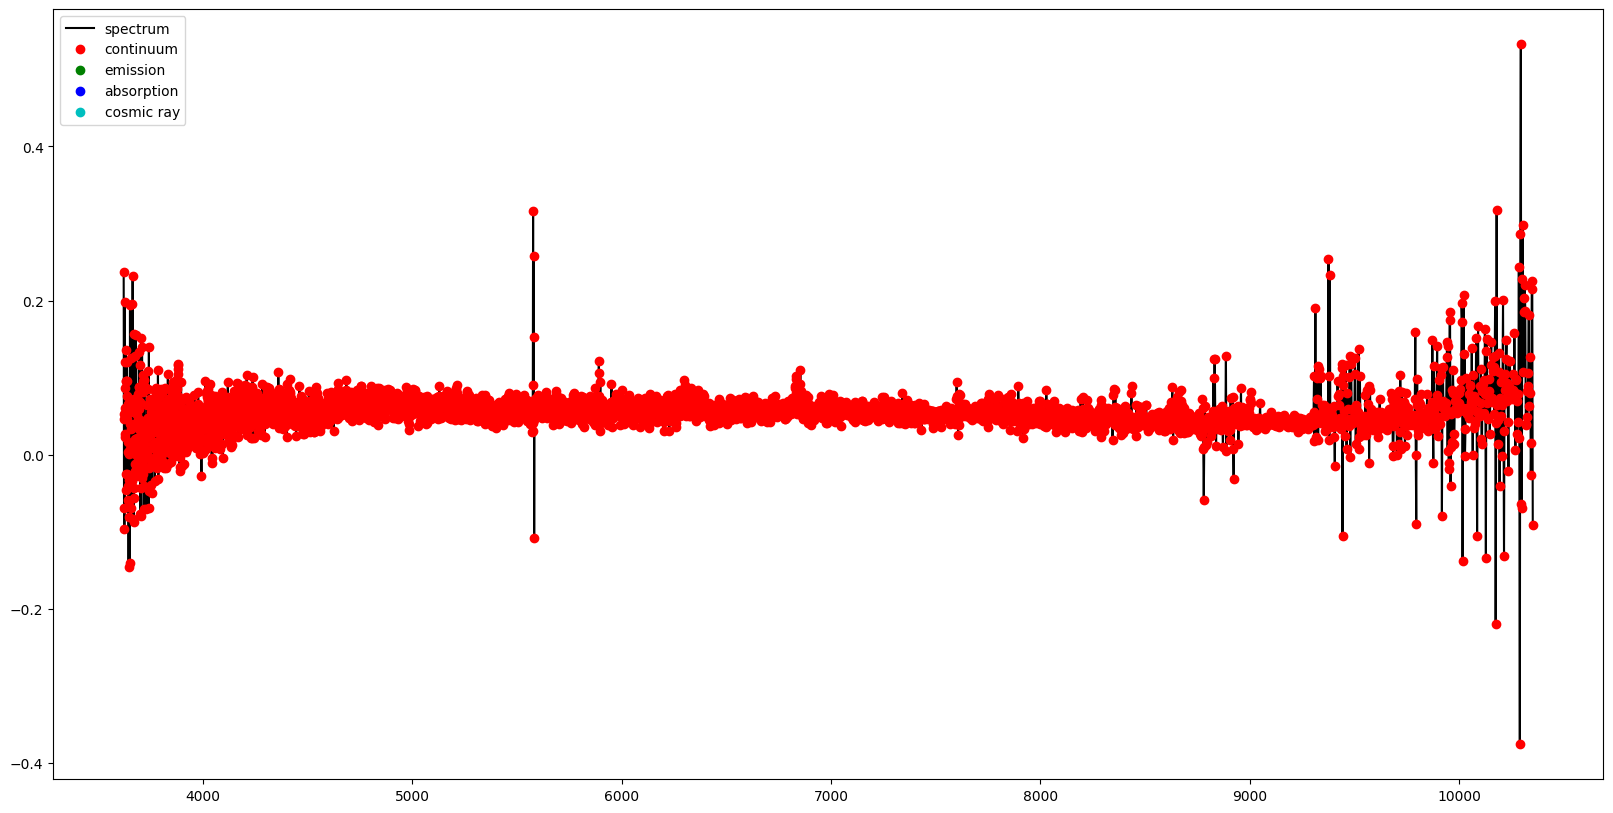

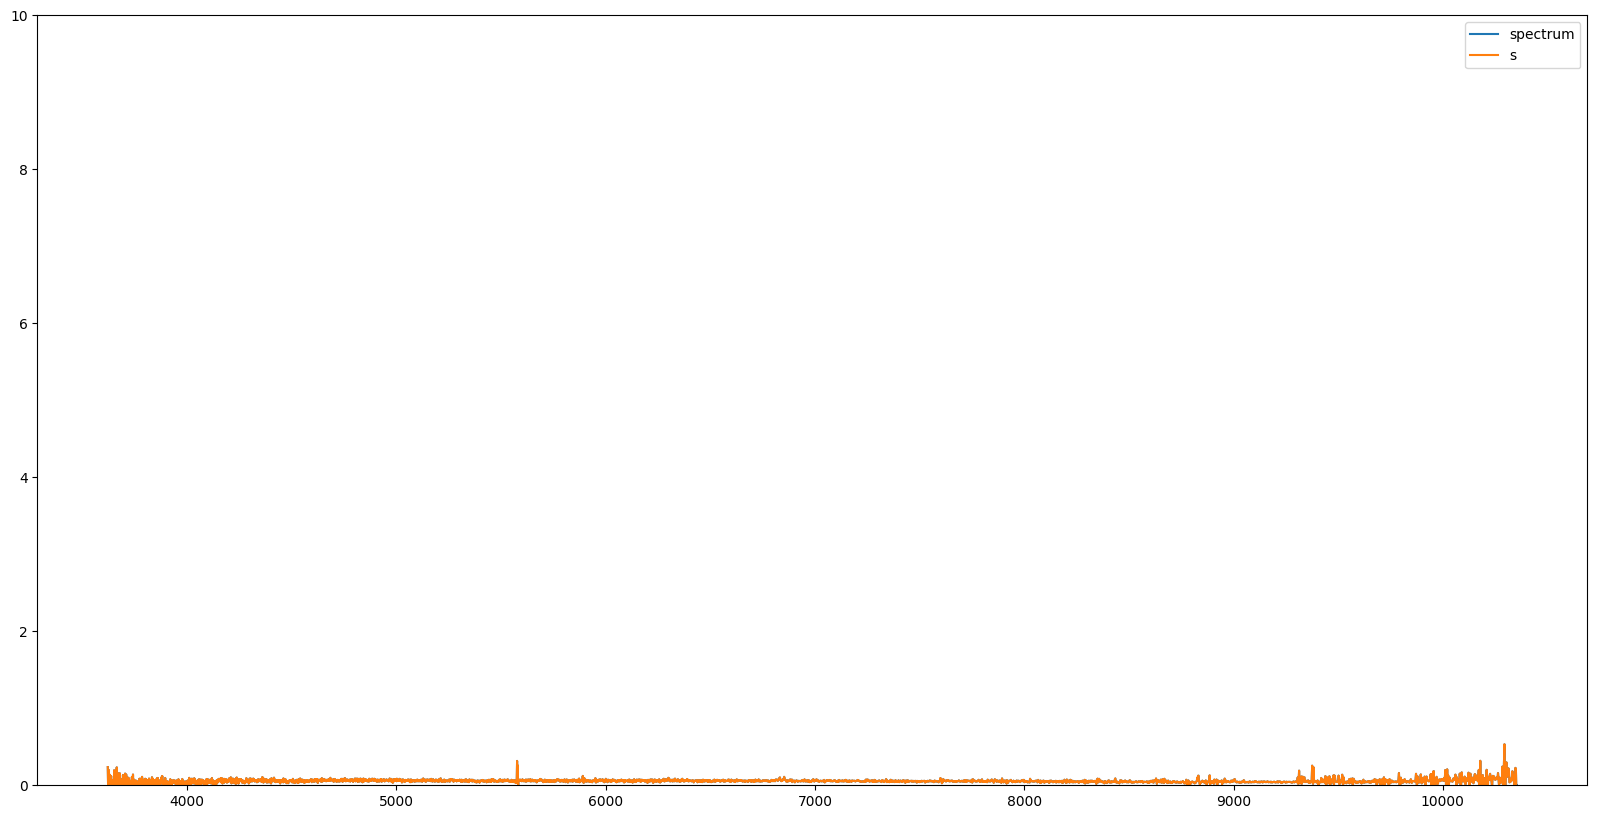

In [183]:
continuum_inds = np.array([0,1,2,10])
emission_inds = np.array([3,6,7,8])
absorption_inds = np.array([9,11])
cosmic_ray_inds = np.array([4,5])

cont = np.where(np.isin(spec.infer.pred_arr, continuum_inds))
emission = np.where(np.isin(spec.infer.pred_arr, emission_inds))
absorption = np.where(np.isin(spec.infer.pred_arr, absorption_inds))
cosmic_ray = np.where(np.isin(spec.infer.pred_arr, cosmic_ray_inds))

fig = plt.figure(figsize=(20, 10))
plt.plot(wavelength_array, spec.flux.data, 'k-', label='spectrum')
plt.plot(wavelength_array[cont], spec.flux.data[cont], 'ro', label='continuum')
plt.plot(wavelength_array[emission], spec.flux.data[emission], 'go', label='emission')
plt.plot(wavelength_array[absorption], spec.flux.data[absorption], 'bo', label='absorption')
plt.plot(wavelength_array[cosmic_ray], spec.flux.data[cosmic_ray], 'co', label='cosmic ray')
plt.legend()
# plt.ylim(0,10)
# plt.xlim(4000, 4500)
plt.show()

fig = plt.figure(figsize=(20, 10))
plt.plot(wav, spec.flux.data, 'k-', label='spectrum')
plt.plot(wav[cont], spec.flux.data[cont], 'ro', label='continuum')
plt.plot(wav[emission], spec.flux.data[emission], 'go', label='emission')
plt.plot(wav[absorption], spec.flux.data[absorption], 'bo', label='absorption')
plt.plot(wav[cosmic_ray], spec.flux.data[cosmic_ray], 'co', label='cosmic ray')
plt.legend()
# plt.ylim(0,10)
# plt.xlim(4000, 4500)
plt.show()

fig = plt.figure(figsize=(20, 10))
plt.plot(wavelength_array, spec.flux.data, label='spectrum')
plt.plot(wav, spec.flux.data, label='s')
plt.legend()
plt.ylim(0, 10)
plt.show()


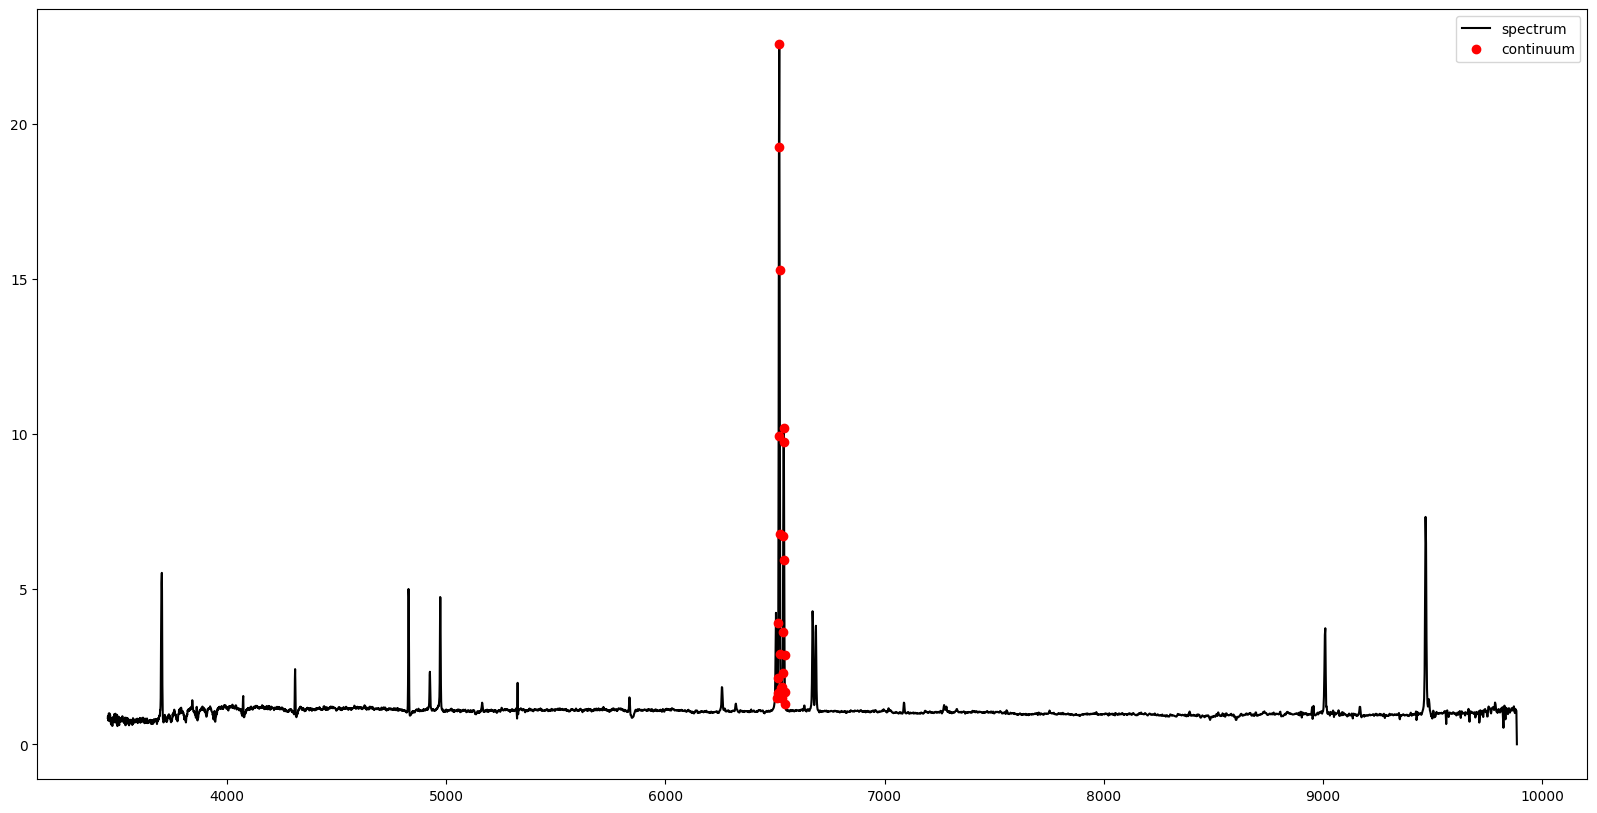

In [141]:
cont = np.where(spec.infer.pred_arr == 3)
# emission = np.where(np.isin(spec.infer.pred_arr, emission_inds))
# absorption = np.where(np.isin(spec.infer.pred_arr, absorption_inds))
# cosmic_ray = np.where(np.isin(spec.infer.pred_arr, cosmic_ray_inds))

fig = plt.figure(figsize=(20, 10))
plt.plot(wavelength_array, spec.flux.data, 'k-', label='spectrum')
plt.plot(wavelength_array[cont], spec.flux.data[cont], 'ro', label='continuum')
# plt.plot(wavelength_array[emission], spec.flux.data[emission], 'go', label='emission')
# plt.plot(wavelength_array[absorption], spec.flux.data[absorption], 'bo', label='absorption')
# plt.plot(wavelength_array[cosmic_ray], spec.flux.data[cosmic_ray], 'co', label='cosmic ray')
plt.legend()
# plt.ylim(0,10)
# plt.xlim(4000, 4500)
plt.show()

In [135]:
aspect.cfg

{'metadata': {'name': 'aspect-stable', 'version': '0.5.0'},
 'shape_number': {'undefined': 0,
  'white-noise': 1,
  'continuum': 2,
  'emission': 3,
  'cosmic-ray': 4,
  'pixel-line': 5,
  'broad': 6,
  'doublet': 7,
  'peak': 8,
  'absorption': 9,
  'dead-pixel': 10,
  'trough': 11,
  'phl293B': 12,
  'Hbeta_OIII-doublet': 13},
 'colors': {'undefined': 'black',
  'white-noise': '#C41E3A',
  'continuum': '#F48CBA',
  'emission': '#00FF98',
  'cosmic-ray': '#FFF468',
  'pixel-line': '#0070DD',
  'broad': '#A330C9',
  'doublet': '#3FC7EB',
  'peak': '#C69B6D',
  'absorption': '#FF7C0A',
  'dead-pixel': '#8788EE',
  'phl293B': '#33937F',
  'Hbeta_OIII-doublet': '#33937F'},
 'decision_matrices': {'decision_colors': ['#be6530', '#72a7c2'],
  'choice_labels': ['1st option', '2nd option'],
  'choice': [[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
   [0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
   [0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 1

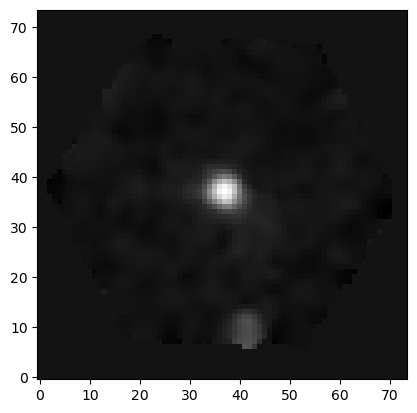

In [10]:
plt.imshow(flux_cube[400], origin='lower', cmap='gray')
plt.show()

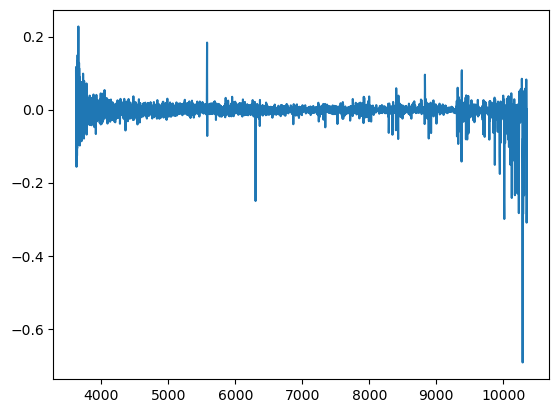

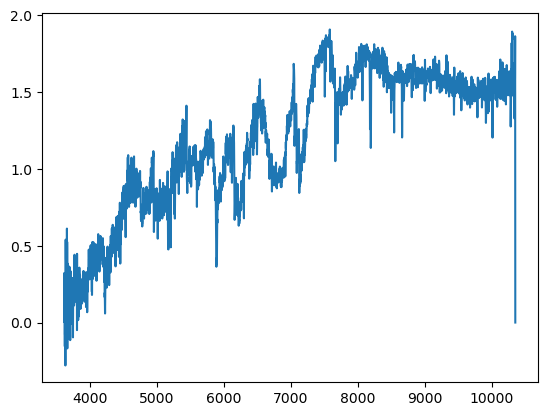

In [13]:
plt.plot(wave, flux_cube[:, 40,10], label='flux')
plt.show()

plt.plot(wave, flux_cube[:, 7,40], label='flux')
plt.show()

In [66]:
flux_cube

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [72]:
np.unique(cube[1].data == flux_cube)

array([ True])

In [46]:
data =(cube[1].data)

In [56]:
np.shape(data)

(4563, 74, 74)

In [ ]:
data[24,25]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.05557027,
       -0.0561749 , -0.06852864, -0.06218118, -0.06782573, -0.05046822,
       -0.01806879,  0.02744305,  0.06136785,  0.08319367,  0.09280409,
        0.11320462,  0.14359847,  0.12928459,  0.06597516, -0.00442113,
       -0.02141076,  0.01298239,  0.05520933,  0.06352822,  0.05203522,
        0.02829379, -0.02776279, -0.07351534, -0.08254443, -0.04467752,
       -0.02224138, -0.00810642,  0.01198216,  0.02532526,  0.00968061,
       -0.01180089, -0.04366377, -0.08721649, -0.09860905, -0.09536301,
       -0.07926137, -0.08017137, -0.08853731, -0.09161589, -0.07162018,
       -0.03053199,  0.0076936 ,  0.04122466,  0.03697054, -0.020553  ,
       -0.04518884, -0.034326  , -0.02951094, -0.018562  , -0.00990112,
       -0.00964493, -0.01554961, -0.02745456, -0.04691598, -0.06710371,
       -0.08921394,  0.        ,  0.        ,  0.        ,  0.  

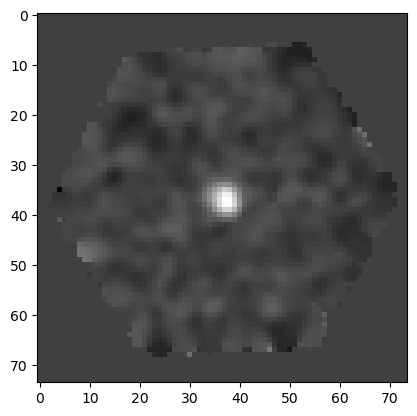

In [61]:
plt.imshow(data[0], cmap='gray')
plt.show()
